In [66]:
#https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

In [2]:
#Configuring the IO structure:
W_size=3
st=4
et=22
Bin_size=1
prediction_size=1
n_features=282
irows=int(W_size/Bin_size)
icols=n_features
orows=int(prediction_size/Bin_size)
ocols=280

In [3]:
# Data Preparation
import pandas as pd
# Selecting data based on bin size
if Bin_size==0.5:
    df2 = pd.read_csv('/home/pennyworth/Documents/Bus/Data/from_R_19B_30min_n&f.csv',header =None)
if Bin_size==1:
    df2 = pd.read_csv('/home/pennyworth/Documents/Bus/Data/from_R_19B_1Hr_n&f.csv',header =None)
    
#Converting dataframe into matrix    
dataset=df2.as_matrix()

/home/pennyworth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [4]:
#Checking if the import is good to go:
if len(dataset)-1==34*18/Bin_size:
    print("Import successful!")

Import successful!


In [5]:
print(irows,orows)

3 1


In [6]:
def giveme_dataset(rows,cols):
    for i in range(1,rows+1):
        print(dataset[i][:cols])
giveme_dataset(3,3)

[0.         0.01865434 0.10891486]
[0.13697164 0.23473744 0.22698761]
[0.12185569 0.05441312 0.03356269]


In [7]:
#Fixing number of clusters:
nclust=4

#Selecting correlated time bins based on cluster number
if nclust==4:
    df_clust = pd.read_csv('/home/pennyworth/Documents/Bus/Data/STcor_Tree_4branch.csv',header =None)
if nclust==3:
    df_clust = pd.read_csv('/home/pennyworth/Documents/Bus/Data/STcor_Tree_3branch.csv',header =None)
if nclust==2:
    df_clust = pd.read_csv('/home/pennyworth/Documents/Bus/Data/STcor_Tree_2branch.csv',header =None)
index_ps=df_clust[1]

#Creating a list of start time to consider for each model
st2consider=[]
for i in range(nclust):
    st2consider.append([])

#Appending values to sts2consider
for i in range(1,len(index_ps)):
    bloc=int(index_ps[i])
    st2consider[bloc-1].append(i)
    
# Note: Here, in elements of cols2consider, time bins start from 1 and go till 18.
# but while indexing in dataset, it should start from 0 therefore we subtract 1 
# from elements in cols2consider
c2c_copy=st2consider
st2consider=[]
for ar in c2c_copy:
    st2consider.append([k-1 for k in ar])

if st2consider[0]==[k-1 for k in c2c_copy[0]]:
    print("Unit Subraction from st2consider complete! \n")
else:
    print("ERROR: Something wrong with subraction! \n")

#Check if everything is fine
index_l=index_ps.tolist()      # converting pandas series to list
if index_l.count('1')==len(st2consider[0]) and (len(st2consider[nclust-1])==index_l.count(str(nclust))):
    print("Good to go! st2consider seems good..")

Unit Subraction from st2consider complete! 

Good to go! st2consider seems good..


In [8]:
print(st2consider)

[[0, 1, 16], [2, 17], [3, 5, 12, 13, 15], [4, 6, 7, 8, 9, 10, 11, 14]]


In [9]:
# Tutorial or recap:
# The last index is excluded therefore to select 1-18(inclusive) we have to do 1-19
a=[0,1,2,3,4,5,6,7,8,9,10]
print(a[1:4],a[4:7])

[1, 2, 3] [4, 5, 6]


In [10]:
#Tutorial lession for Python0
#df2[:][] # indicates 1st[actaully 2nd] col 2nd[actually 3rd] row
#df2.iloc[0]

In [11]:
# Data from R is same for any bin size.
tdmax=22.8
tdmin=4.066667
def normed2normal(time):
    timo=time*(tdmax - tdmin)+tdmin
    return timo
# Working beautifully for given Min and max time.
#normed2normal(day_df[281])

In [12]:
rows_pday=int((et-st)/Bin_size)

In [13]:
test_size=7
dataset_ytest_strt=(34-test_size)*(rows_pday)
print(dataset[dataset_ytest_strt][:5])
print(dataset[dataset_ytest_strt+5][:5])
print(dataset[dataset_ytest_strt+6][:5])
print(dataset[dataset_ytest_strt+7][:5])

[0.21824496 0.48212612 0.12601081 0.3902106  0.39962889]
[0.20083781 0.46544411 0.24597875 0.23902542 0.35745132]
[0.22675959 0.50208535 0.14565598 0.23546444 0.31752349]
[0.18726386 0.47034024 0.13260803 0.18145204 0.63688261]


In [14]:
df2.iloc[1:19]

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
1,0.000000,0.018654,0.108915,0.183545,0.171919,0.165659,0.438184,0.645631,0.912602,1.000000,...,0.355025,0.326638,0.345500,0.371496,0.429560,0.334780,0.150080,0.079196,0,0.048043
2,0.136972,0.234737,0.226988,0.308071,0.231294,0.180101,0.327687,0.468290,0.503002,0.514084,...,0.222648,0.184583,0.174154,0.175023,0.179747,0.190096,0.103749,0.054376,0,0.076512
3,0.121856,0.054413,0.033563,0.026564,0.122690,0.107086,0.095161,0.540519,0.498543,0.564609,...,0.344293,0.225463,0.138776,0.101768,0.096432,0.127396,0.080119,0.036173,0,0.133007
4,0.067913,0.336853,0.343248,0.348652,0.277010,0.272131,0.304012,0.316855,0.258378,0.173323,...,0.066501,0.071652,0.101920,0.104811,0.082262,0.194070,0.117447,0.052272,0,0.180383
5,0.358118,0.529029,0.422225,0.673523,0.353557,0.175528,0.473389,0.370157,0.342483,0.318403,...,0.124771,0.114581,0.110420,0.122015,0.110733,0.104140,0.067349,0.049862,0,0.236358
6,0.514849,0.388691,0.264007,0.155472,0.378745,0.222156,0.284161,0.242561,0.187751,0.153948,...,0.248470,0.227462,0.364371,0.352929,0.381472,0.374302,0.354957,0.374487,0,0.298043
7,0.250593,0.333912,0.250242,0.351750,0.334049,0.311798,0.304293,0.258749,0.223174,0.203590,...,0.133453,0.119572,0.152373,0.157679,0.176758,0.256806,0.185862,0.150033,0,0.343416
8,0.252986,0.310267,0.247181,0.525499,0.588221,0.480417,0.237586,0.333418,0.320626,0.371215,...,0.172730,0.151381,0.144662,0.115691,0.166968,0.198064,0.246401,0.160080,0,0.407473
9,0.099584,0.313836,0.047375,0.076558,0.147348,0.604265,0.432026,0.192056,0.127818,0.081610,...,0.101314,0.071737,0.086890,0.143353,0.115880,0.253559,0.128225,0.089731,0,0.457592
10,0.210108,0.124796,0.177418,0.330797,0.259416,0.116289,0.094583,0.097446,0.101990,0.123041,...,0.086929,0.080620,0.105977,0.107277,0.203236,0.416704,0.200792,0.173766,0,0.484875


In [15]:
#Defining a list to put sequences in
sequences_by_grp=[]
for grp in range(nclust):
    sequences_by_grp.append([])

#Define the rows per day
rows_pd=int((et-st)/Bin_size)

#For each day travel times in df2 range from 1
for day in range(1,int((len(df2)-1)/rows_pd+1)):
    strt_row=day*rows_pd-17
    end_row=strt_row+rows_pd
    #print("The rows are:",strt_row,end_row)
    day_df=df2.iloc[strt_row:end_row]
    #For each group according to clustered start times
    #print(day_df.iloc[st2consider[0],[0,1,2,3]])
    for grp in range(nclust):
        #print(st2consider[grp])
        #Creating selecting the rows corresponding to the grp and appending the df to the array
        todays_group_df=day_df.iloc[st2consider[grp],:]
        sequences_by_grp[grp].append(todays_group_df.values.tolist())
        
#Checking if the lengths match
if len(sequences_by_grp)==nclust and len(sequences_by_grp[0])==34 and len(sequences_by_grp[0][0])==3:
     print("Creation of sequences good!")
else:
     print("ERROR: Creation of sequences lengths arent as expected")

Creation of sequences good!


In [18]:
import numpy as np
#Converting individual elements of sequences_by_grp to np arrays
for el in range(len(sequences_by_grp)):
    sequences_by_grp[el]=np.asarray(sequences_by_grp[el])

# Note that since the 
sequences_by_grp[3].shape

(34, 8, 282)

In [19]:
# Function to check a X,y pair and look at the lengths:
# Not yet prepared for Model-4
def verify_io(Xi,yi,info,i):
    if info==True:
        print("Number of X Tensors:",len(Xi))
        print("Number of y Tensors:",len(yi))
        print("Number i/o pairs expected:",(34-irows-orows+1))
    elif(len(Xi)==len(yi)==(34-irows-orows+1)):
        print("Number of i/o pairs is as expected!")
    else:
        print("ERROR: Number of i/o pairs is not as expected!")
    if info==True:
        print("Shape of X Tensor:",Xi.shape)
        print("Shape of Y Tensor:",yi.shape)
        print("Number of features expected:",len(cols2consider[i])+2,"for X")
    elif(len(Xi[0][1])-2==len(yi[0])==len(cols2consider[i])):
        print("Number of features is as expected!")
    else:
        print("ERROR: Number of features is not as expected!")
#ALways use info = True as false is not incorporated properly

In [20]:
import numpy as np
#Split sequences according to group number given:
def split_sequences_by_grp(sequences, n_steps_in, n_steps_out,grp_no): # Grp no should start from 0
    for i in range(len(sequences)):
        # Find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # Gather input and output parts of the pattern
        seq_x =sequences[i:end_ix][:]
        seq_y = sequences[end_ix:out_end_ix,:,:-2][0]
        Xl[grp_no].append(seq_x)
        yl[grp_no].append(seq_y)
    # Change th +2 below incase the number of inputs and outputs is changed
    #first[0] indicates 1st day of the 3 day input. next[0] indicates 1st start time in grp
    if len(seq_x[0][0])!= len(seq_y[0])+2:
        print("ERROR: column selection wrong!")
    return None

In [21]:
# multivariate multi-step data preparation
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# Create a list of X and y to put in X and y for different groups.
yl=[]
for i in range(nclust):
    yl.append([])
Xl=[]
for i in range(nclust):
    Xl.append([])
    
n_days_in, n_days_out = 3, 1

#Generate IO Matrices
for grp in range(nclust):
    split_sequences_by_grp(sequences_by_grp[grp], n_days_in, n_days_out,grp)

# for i in range(1,35):
#     todays_df=dataset[(i-1)*rows_pday+1:i*rows_pday+1]
#     for j in range(nclust):
#         split_sequences_by_grp(todays_df, n_steps_in, n_steps_out,j)

# #Check if the matrix are created properly:
# verify_io(Xl[0],yl[0],False,0)
# verify_io(Xl[1],yl[1],True,1)
# verify_io(Xl[2],yl[2],False,2)
# verify_io(Xl[3],yl[3],False,3)
#Pending verification


Using TensorFlow backend.


In [22]:
for el in range(len(Xl)):
    Xl[el]=np.asarray(Xl[el])
print('X shapes:')
print("Group -1",Xl[0].shape)
print("Group -2",Xl[1].shape)
print("Group -3",Xl[2].shape)
print("Group -4",Xl[3].shape)
for el in range(len(yl)):
    yl[el]=np.asarray(yl[el])
print('y shapes:')
print("Group -1",yl[0].shape)
print("Group -2",yl[1].shape)
print("Group -3",yl[2].shape)
print("Group -4",yl[3].shape)

X shapes:
Group -1 (31, 3, 3, 282)
Group -2 (31, 3, 2, 282)
Group -3 (31, 3, 5, 282)
Group -4 (31, 3, 8, 282)
y shapes:
Group -1 (31, 3, 280)
Group -2 (31, 2, 280)
Group -3 (31, 5, 280)
Group -4 (31, 8, 280)


In [23]:
# Print number of IO Pairs available:
print(len(yl[0])," I/O pairs available")
#verify_io(X1,y1,True,0)

31  I/O pairs available


In [24]:
# Making kinda aliases
X1,y1=Xl[0],yl[0]
X2,y2=Xl[1],yl[1]
X3,y3=Xl[2],yl[2]
X4,y4=Xl[3],yl[3]

In [25]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [26]:
#Morphing input and output shapes
print("Shape of X1:",X1.shape)
print("Shape of X2:",X2.shape)
print("Shape of X3:",X3.shape)
print("Shape of X4:",X4.shape)
print("Shape of y1:",y1.shape)
print("Shape of y2:",y2.shape)
print("Shape of y3:",y3.shape)
print("Shape of y4:",y4.shape,"\n")

#Morphing
reshaped_X1=X1.reshape(34-irows-orows+1,X1.shape[2]*X1.shape[1],282)
reshaped_y1=y1.reshape(34-irows-orows+1,280*y1.shape[1])
reshaped_X2=X2.reshape(34-irows-orows+1,X2.shape[2]*X2.shape[1],282)
reshaped_y2=y2.reshape(34-irows-orows+1,280*y2.shape[1])
reshaped_X3=X3.reshape(34-irows-orows+1,X3.shape[2]*X3.shape[1],282)
reshaped_y3=y3.reshape(34-irows-orows+1,280*y3.shape[1])
reshaped_X4=X4.reshape(34-irows-orows+1,X4.shape[2]*X4.shape[1],282)
reshaped_y4=y4.reshape(34-irows-orows+1,280*y4.shape[1])
reshaped_y1.shape,reshaped_X1.shape

#After Morphing:
print("After Morphing: \n")
print("Shape of X1:",reshaped_X1.shape)
print("Shape of X2:",reshaped_X2.shape)
print("Shape of X3:",reshaped_X3.shape)
print("Shape of X4:",reshaped_X4.shape)
print("Shape of y1:",reshaped_y1.shape)
print("Shape of y2:",reshaped_y2.shape)
print("Shape of y3:",reshaped_y3.shape)
print("Shape of y4:",reshaped_y4.shape)


Shape of X1: (31, 3, 3, 282)
Shape of X2: (31, 3, 2, 282)
Shape of X3: (31, 3, 5, 282)
Shape of X4: (31, 3, 8, 282)
Shape of y1: (31, 3, 280)
Shape of y2: (31, 2, 280)
Shape of y3: (31, 5, 280)
Shape of y4: (31, 8, 280) 

After Morphing: 

Shape of X1: (31, 9, 282)
Shape of X2: (31, 6, 282)
Shape of X3: (31, 15, 282)
Shape of X4: (31, 24, 282)
Shape of y1: (31, 840)
Shape of y2: (31, 560)
Shape of y3: (31, 1400)
Shape of y4: (31, 2240)


In [27]:
#Xl looks fine and similar to original data

In [28]:
# Creating mask fo splitting dataset

test_size=7
train_end=(31-test_size)
msk=[]
for i in range(31):
    if i<train_end:
        msk.append(True)
    else:
        msk.append(False)
msk=np.asarray(msk)

#Splitting dataset
X1_train = reshaped_X1[msk]
y1_train = reshaped_y1[msk]
X1_test = reshaped_X1[~msk]
y1_test = reshaped_y1[~msk]
print("Dataset splitting done! for Grp-1")


Dataset splitting done! for Grp-1


In [29]:
#Giving the number of rows and columns in input and output
in_rows=reshaped_X1.shape[1]
in_cols=reshaped_X1.shape[2]
on_cols=reshaped_y1.shape[1]

# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(in_rows, in_cols)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(500, activation='relu'))
model1.add(Dense(on_cols))
model1.compile(optimizer='adam', loss=['mse'],metrics=["mape"])
epochno=12

# fit model
history=model1.fit(X1_train, y1_train, epochs=epochno, verbose=0, validation_data = (X1_test, y1_test))
print("Group-1 ; Model-3 \n")
print("Number of epochs:",epochno)
print("Number of starting times considered:",X1_train.shape[1]/n_days_in)
print("Number of input days:",n_days_in)
print("Number of output days:",n_days_out)
print("Bin size:",Bin_size)
print("Window size:",W_size)
print("Number of I/O pairs available for training:",len(y1_train))
print("Number of I/O pairs available for testing:",len(y1_test))
print("Model Mape loss:",model1.evaluate(X1_test,y1_test)[1])
print("Model MSE loss (Minimized):",model1.evaluate(X1_test,y1_test)[0])
print("RMSE loss:",np.sqrt(model1.evaluate(X1_test,y1_test)[0]))

# Demonstrate Prediction
# x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

W0719 23:06:42.398898 139703413970752 deprecation_wrapper.py:119] From /home/pennyworth/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 23:06:42.408323 139703413970752 deprecation_wrapper.py:119] From /home/pennyworth/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 23:06:42.420665 139703413970752 deprecation_wrapper.py:119] From /home/pennyworth/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 23:06:42.472908 139703413970752 deprecation_wrapper.py:119] From /home/pennyworth/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W07

Group-1 ; Model-3 

Number of epochs: 12
Number of starting times considered: 3.0
Number of input days: 3
Number of output days: 1
Bin size: 1
Window size: 3
Number of I/O pairs available for training: 24
Number of I/O pairs available for testing: 7
7/7 [==============================] - 0s 188us/step
Model Mape loss: 5272673.0
7/7 [==============================] - 0s 196us/step
Model MSE loss (Minimized): 0.04678555950522423
7/7 [==============================] - 0s 338us/step
RMSE loss: 0.21629969834751095


In [30]:
y1_test[0]

array([0.19938049, 0.37831039, 0.2047888 , 0.39692492, 0.32014148,
       0.22549949, 0.43996084, 0.4598362 , 0.4463474 , 0.48259189,
       0.54392873, 0.40924011, 0.20648134, 0.26541185, 0.36899685,
       0.41785607, 0.39184018, 0.33742398, 0.22638465, 0.24159707,
       0.43055901, 0.51411972, 0.35110653, 0.54990756, 0.45472455,
       0.51233822, 0.49247921, 0.50706971, 0.47353846, 0.48455376,
       0.51755006, 0.53664104, 0.54898955, 0.496844  , 0.53244308,
       0.5514087 , 0.59611826, 0.59410182, 0.52453534, 0.43639509,
       0.28960152, 0.1946509 , 0.46331782, 0.59023241, 0.62895875,
       0.63232168, 0.58033402, 0.22254091, 0.12862646, 0.39520552,
       0.56686221, 0.5099656 , 0.45068148, 0.32204521, 0.41629345,
       0.49335578, 0.51908205, 0.49343961, 0.56957831, 0.50706391,
       0.48206283, 0.45567677, 0.20563226, 0.33144442, 0.33880116,
       0.52886866, 0.46406444, 0.42930578, 0.46007791, 0.31332435,
       0.40551846, 0.32034446, 0.51008706, 0.4294581 , 0.33180

In [31]:
# Splitting into train and test sets
# np.random.seed(95)
# msk = np.random.rand(len(reshaped_X2)) < 0.8
X_train = reshaped_X2[msk]
y_train = reshaped_y2[msk]
X_test = reshaped_X2[~msk]
y_test = reshaped_y2[~msk]
print("Dataset splitting done! for Grp-2")

#Giving the number of rows and columns in input and output
in_rows=reshaped_X2.shape[1]
in_cols=reshaped_X2.shape[2]
on_cols=reshaped_y2.shape[1]

# multivariate output multi-step 1d cnn example

# define model
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(in_rows, in_cols)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dense(on_cols))
model2.compile(optimizer='adam', loss=['mse'],metrics=["mape"])
epochno=12

# fit model
history=model2.fit(X_train, y_train, epochs=epochno, verbose=0, validation_data = (X_test, y_test))
print("Group-2 ; Model-3 \n")
print("Number or epochs:",epochno)
print("Number of starting times considered:",X_train.shape[1]/n_days_in)
print("Number of input days:",n_days_in)
print("Number of output days:",n_days_out)
print("Bin size:",Bin_size)
print("Window size:",W_size)
print("Number of I/O pairs available for training:",len(y_train))
print("Number of I/O pairs available for testing:",len(y_test))
print("Model Mape loss:",model2.evaluate(X_test,y_test)[1])
print("Model MSE loss (Minimized):",model2.evaluate(X_test,y_test)[0])
print("RMSE loss:",np.sqrt(model2.evaluate(X_test,y_test)[0]))

# Demonstrate Prediction
# x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Dataset splitting done! for Grp-2
Group-2 ; Model-3 

Number or epochs: 12
Number of starting times considered: 2.0
Number of input days: 3
Number of output days: 1
Bin size: 1
Window size: 3
Number of I/O pairs available for training: 24
Number of I/O pairs available for testing: 7
7/7 [==============================] - 0s 149us/step
Model Mape loss: 414863.5625
7/7 [==============================] - 0s 218us/step
Model MSE loss (Minimized): 0.03624973073601723
7/7 [==============================] - 0s 176us/step
RMSE loss: 0.19039362052342307


In [32]:
# Splitting into train and test sets
# np.random.seed(95)
# msk = np.random.rand(len(reshaped_X3)) < 0.8
X_train = reshaped_X3[msk]
y_train = reshaped_y3[msk]
X_test = reshaped_X3[~msk]
y_test = reshaped_y3[~msk]
print("Dataset splitting done! for Grp-3")

#Giving the number of rows and columns in input and output
in_rows=reshaped_X3.shape[1]
in_cols=reshaped_X3.shape[2]
on_cols=reshaped_y3.shape[1]

# multivariate output multi-step 1d cnn example

# define model
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(in_rows, in_cols)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(500, activation='relu'))
model3.add(Dense(on_cols))
model3.compile(optimizer='adam', loss=['mse'],metrics=["mape"])
epochno=12

# fit model
history=model3.fit(X_train, y_train, epochs=epochno, verbose=0, validation_data = (X_test, y_test))
print("Group-3 ; Model-3 \n")
print("Number or epochs:",epochno)
print("Number of starting times considered:",X_train.shape[1]/n_days_in)
print("Number of input days:",n_days_in)
print("Number of output days:",n_days_out)
print("Bin size:",Bin_size)
print("Window size:",W_size)
print("Number of I/O pairs available for training:",len(y_train))
print("Number of I/O pairs available for testing:",len(y_test))
print("Model Mape loss:",model3.evaluate(X_test,y_test)[1])
print("Model MSE loss (Minimized):",model3.evaluate(X_test,y_test)[0])
print("RMSE loss:",np.sqrt(model3.evaluate(X_test,y_test)[0]))

# Demonstrate Prediction
# x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Dataset splitting done! for Grp-3
Group-3 ; Model-3 

Number or epochs: 12
Number of starting times considered: 5.0
Number of input days: 3
Number of output days: 1
Bin size: 1
Window size: 3
Number of I/O pairs available for training: 24
Number of I/O pairs available for testing: 7
7/7 [==============================] - 0s 281us/step
Model Mape loss: 1357960.875
7/7 [==============================] - 0s 330us/step
Model MSE loss (Minimized): 0.048069603741168976
7/7 [==============================] - 0s 248us/step
RMSE loss: 0.21924781353794381


In [33]:
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False])

In [34]:
# Splitting into train and test sets
# np.random.seed(95)
# msk = np.random.rand(len(reshaped_X4)) < 0.8
X_train = reshaped_X4[msk]
y_train = reshaped_y4[msk]
X_test = reshaped_X4[~msk]
y_test = reshaped_y4[~msk]
print("Dataset splitting done! for Grp-4")

#Giving the number of rows and columns in input and output
in_rows=reshaped_X4.shape[1]
in_cols=reshaped_X4.shape[2]
on_cols=reshaped_y4.shape[1]

print(in_rows,in_cols,on_cols)
# multivariate output multi-step 1d cnn example

# define model
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(in_rows, in_cols)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(500, activation='relu'))
model4.add(Dense(on_cols))
model4.compile(optimizer='adam', loss=['mse'],metrics=["mape"])
epochno=12

# fit model
history=model4.fit(X_train, y_train, epochs=epochno, verbose=0, validation_data = (X_test, y_test))
print("Group-4 ; Model-3 \n")
print("Number or epochs:",epochno)
print("Number of starting times considered:",X_train.shape[1]/n_days_in)
print("Number of input days:",n_days_in)
print("Number of output days:",n_days_out)
print("Bin size:",Bin_size)
print("Window size:",W_size)
print("Number of I/O pairs available for training:",len(y_train))
print("Number of I/O pairs available for testing:",len(y_test))
print("Model Mape loss:",model4.evaluate(X_test,y_test)[1])
print("Model MSE loss (Minimized):",model4.evaluate(X_test,y_test)[0])
print("RMSE loss:",np.sqrt(model4.evaluate(X_test,y_test)[0]))

# Demonstrate Prediction
# x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Dataset splitting done! for Grp-4
24 282 2240
Group-4 ; Model-3 

Number or epochs: 12
Number of starting times considered: 8.0
Number of input days: 3
Number of output days: 1
Bin size: 1
Window size: 3
Number of I/O pairs available for training: 24
Number of I/O pairs available for testing: 7
7/7 [==============================] - 0s 268us/step
Model Mape loss: 3436473.75
7/7 [==============================] - 0s 309us/step
Model MSE loss (Minimized): 0.04181321710348129
7/7 [==============================] - 0s 752us/step
RMSE loss: 0.20448280393099388


In [35]:
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False])

dict_keys(['val_loss', 'val_mean_absolute_percentage_error', 'loss', 'mean_absolute_percentage_error'])


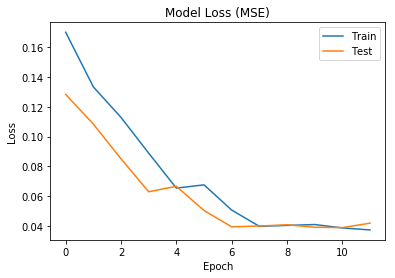

In [36]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
#axes = plt.gca()
#axes.set_ylim([7500,0.2*100000])
#axes.set_xlim([1500,3000])
plt.show()

In [115]:
#Scaling the IO values and then determining MSE and shit
import pandas as pd

# Selecting data min-max data
Minmax = pd.read_csv('/home/pennyworth/Documents/Bus/Data/Minmax.csv')

#Functions to calculate error
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [116]:
Minmax

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281
0,144.393008,115.714823,42.493365,24.211194,20.792030,31.301400,15.261249,11.463829,10.438957,10.160103,...,14.777967,13.615912,14.194309,13.784148,15.715016,15.611628,16.334124,23.636502,32.203997,NaN
1,21.743496,27.824041,12.590967,10.181975,9.777823,10.144633,8.673208,7.440940,6.730975,6.393548,...,6.273787,6.223952,6.223956,6.212245,6.268387,6.356335,6.478718,6.811262,7.332060,NaN


In [138]:
y_act_Days=[[] for i in range(7)]
y_pdt_Days=[[] for i in range(7)]

In [139]:
st2consider[0][1]

1

In [140]:
def get_accuracy(X_val,y_val,model):
    print("X Shape",X_val.shape)
    print("Y Shape",y_val.shape)
    MSE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    for io in range(len(X_val)):
        #Calculating the predicted and actual value for the ioth sample
        x_input = X_val[io]
        x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))
        yhat = model.predict(x_input, verbose=0)
        y_output = y_val[io]
        pdt=yhat[0]
        act=y_output
        y_act_Days[io].append(act)
        y_pdt_Days[io].append(pdt)
        pdt_cor=denormalize_output(pdt)
        act_cor=denormalize_output(act)
        if len(pdt_cor)!=len(act_cor):
            print("ERROR")
            print("Predicted length:",len(pdt_cor))
            print("Actual length:",len(act_cor))  
#         if io==1:
#             x=list(range(1,281))
#             plt.plot(x, act_cor[0:280], color='orange',label="Actual")
#             plt.plot(x, pdt_cor[0:280], color='g',label="Predicted")
#             plt.xlabel('Segments')
#             plt.ylabel('Travel time (s)')
#             plt.title('Predicted vs Actual')
#             axes = plt.gca()
#             #axes.set_ylim([0,180])
#             axes.set_xlim([-2,280+10])
#             leg = plt.legend();
#             plt.show()
        MSE_list.append(mean_squared_error(act_cor,pdt_cor))
        RMSE_list.append(np.sqrt(mean_squared_error(act_cor,pdt_cor)))
        MAPE_list.append(mean_absolute_percentage_error(act_cor,pdt_cor))
    #Taking the mean of error values throughout the test set
    mean_MSE=sum(MSE_list)/len(MSE_list)
    mean_RMSE=sum(RMSE_list)/len(RMSE_list)
    mean_MAPE=sum(MAPE_list)/len(MAPE_list)
    print("MSE:",sum(MSE_list)/len(MSE_list))
    print("RMSE:",sum(RMSE_list)/len(RMSE_list))
    print("MAPE:",sum(MAPE_list)/len(MAPE_list))
    return mean_MSE,mean_RMSE,mean_MAPE


In [141]:
trained_models=[model1,model2,model3,model4]
X_test_list=[reshaped_X1[~msk],reshaped_X2[~msk],reshaped_X3[~msk],reshaped_X4[~msk]]
y_test_list=[reshaped_y1[~msk],reshaped_y2[~msk],reshaped_y3[~msk],reshaped_y4[~msk]]

#get_accuracy(X_test,y_test,model1)
#Average accuracy along the models:
MSE_models=[[] for i in range(4)]
RMSE_models=[[] for i in range(4)]
MAPE_models=[[] for i in range(4)]
for i in range(4):
    #print(len(st2consider[i]))
    #print(X_test_list[i].shape)
    MSE_models[i],RMSE_models[i],MAPE_models[i]=get_accuracy(X_test_list[i],y_test_list[i],trained_models[i])

X Shape (7, 9, 282)
Y Shape (7, 840)
MSE: 34.91220373205879
RMSE: 5.849957879565032
MAPE: 13.788817341936705
X Shape (7, 6, 282)
Y Shape (7, 560)
MSE: 28.62470868899731
RMSE: 5.260304768307333
MAPE: 11.483982540812077
X Shape (7, 15, 282)
Y Shape (7, 1400)
MSE: 59.60958013705125
RMSE: 7.650059953352779
MAPE: 16.47901620166603
X Shape (7, 24, 282)
Y Shape (7, 2240)
MSE: 52.65723399426298
RMSE: 7.211585194319503
MAPE: 13.7987268197526


In [142]:
y_act_Days[0][0][0:5]

array([0.19938049, 0.37831039, 0.2047888 , 0.39692492, 0.32014148])

In [143]:
st2consider

[[0, 1, 16], [2, 17], [3, 5, 12, 13, 15], [4, 6, 7, 8, 9, 10, 11, 14]]

In [146]:
#Function to arrage start times for one day
def dejumbler_day(day_list):
    #preparing a template which needs to be filled
    arranged_day_df=[[] for i in range(18)]
    for group in range(len(day_list)):
        #print("Group:",group)
        day_list[group]=np.asarray(day_list[group])
        nos_st=int(len(day_list[group])/280)
        separated_tt_list=day_list[group].reshape(nos_st,280)
        for st_pos in range(nos_st):
            #print(group,st_pos)
            position_in_day=st2consider[group][st_pos]
            #print("st_pos:",st_pos)
            #print("Position in day:",position_in_day)
            arranged_day_df[position_in_day]=separated_tt_list[st_pos]
    arranged_day_df=np.asarray(arranged_day_df)
    return arranged_day_df

In [147]:
#Create a list of of arranged normal times by day
arranged_act_normal_days=[]
for day_no in range(len(y_act_Days)):
    arranged_act_normal_days.append(dejumbler_day(y_act_Days[day_no]))
arranged_pdt_normal_days=[]
for day_no in range(len(y_pdt_Days)):
    arranged_pdt_normal_days.append(dejumbler_day(y_pdt_Days[day_no]))

In [158]:
np.asarray(arranged_act_normal_days)[4]


array([[0.00971653, 0.        , 0.0736603 , ..., 0.40086095, 0.59996226,
        0.4602824 ],
       [0.25445439, 0.21800948, 0.24856229, ..., 0.19744977, 0.2424755 ,
        0.19738001],
       [0.22369633, 0.30467783, 0.348667  , ..., 0.21704007, 0.20199955,
        0.18352821],
       ...,
       [0.11329213, 0.13876996, 0.1458136 , ..., 0.27795067, 0.21412631,
        0.50508112],
       [0.17616678, 0.73962857, 0.20623252, ..., 0.52155269, 0.27687837,
        0.09233668],
       [0.15292963, 0.17413015, 0.17172129, ..., 0.07392537, 0.03487118,
        0.02972059]])

In [160]:
import matplotlib.pyplot as plt
import numpy as np

act_cor_all=[]
pdt_cor_all=[]

#Function to denormalize output 
def denormalize(nor_pdt):
    pdt_cor=[i for i in range(280)]
    i=0
    for col in Minmax.drop(["V281"],axis=1):
        mn=Minmax[col][1]
        mx=Minmax[col][0]
        pdt_cor[i]=(nor_pdt[i]*(mx - mn))+mn
        i=i+1
    return pdt_cor

#Denormalizing arranged_act_normal_days and arranged_pdt_normal_days
for dayno in range(len(arranged_act_normal_days)):
    for st_no in range(len(arranged_act_normal_days[0])):
        act_final=denormalize(arranged_act_normal_days[dayno][st_no])
        pdt_final=denormalize(arranged_pdt_normal_days[dayno][st_no])
        act_cor_all.append(act_final)
        pdt_cor_all.append(pdt_final)        

In [166]:
#Checking shape and assigning new dataframes
np.asarray(act_cor_all).shape
np.asarray(pdt_cor_all).shape
act_Dataframe=pd.DataFrame(act_cor_all)
pdt_Dataframe=pd.DataFrame(pdt_cor_all)
pdt_Dataframe.to_csv("Model4_pdt.csv")
act_Dataframe.to_csv("Model4_act.csv")

In [164]:
act_Dataframe

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,46.197416,61.074037,18.714643,15.750522,13.303928,14.915473,11.571688,9.290810,8.386023,8.211257,...,8.721113,8.514951,7.954308,7.995264,8.109051,8.092558,8.417132,8.691875,9.148074,10.803121
1,26.903584,45.595783,17.437163,14.366782,13.973078,15.087988,12.534255,10.242160,9.234507,9.447137,...,11.311851,11.299822,9.111736,8.855477,8.915892,8.807944,9.744316,10.020457,10.318673,9.289304
2,36.087615,61.119927,15.899862,12.635047,11.256254,14.206569,10.351245,8.398756,7.561851,7.356357,...,7.445365,6.944075,6.937101,7.399806,7.649568,7.486358,7.448187,7.317413,7.525058,8.684222
3,40.528443,59.223449,14.319936,12.459598,11.884006,12.911722,9.996614,8.313989,7.597568,7.593655,...,7.456271,7.156019,7.110861,7.097918,7.433326,7.523998,7.612857,7.598032,8.191253,14.631272
4,46.376156,68.732288,19.946321,13.535315,13.714866,27.438460,12.254001,9.538382,8.199103,7.773808,...,8.065917,7.628095,7.464654,7.464667,7.293406,7.440419,7.943562,7.838474,7.318893,14.975247
5,49.555449,71.952715,16.946430,13.485357,13.275093,18.872161,11.710225,9.819211,8.929077,8.574215,...,7.446314,7.209380,7.235689,7.338476,7.409429,7.512017,7.795929,7.627001,8.297728,11.699982
6,44.711317,69.162613,16.556265,12.727605,16.792580,22.867311,10.805399,9.268554,8.536721,9.427576,...,8.302867,8.043931,7.981704,7.829818,7.696997,8.723093,7.883919,8.830031,10.611824,12.075008
7,56.413500,77.788223,18.236680,15.580648,16.903453,21.429421,11.447322,8.951905,8.013205,7.650747,...,7.257382,7.094280,7.310796,7.265968,7.670667,7.790486,7.484981,8.204081,9.118751,11.232533
8,38.794800,59.434436,14.964084,12.557345,14.532090,17.221475,12.231281,9.359869,8.029270,7.358508,...,7.448299,7.338292,7.692425,7.866442,8.385701,8.697539,8.691965,8.765820,10.102229,10.928308
9,39.448371,68.366936,22.952155,15.799531,14.769493,19.989429,11.760316,9.287269,8.191184,7.805506,...,9.242432,8.341544,8.629168,9.363866,7.053805,7.454070,9.027161,8.417813,9.091802,10.244016


In [46]:
print("Model - 4")
print("Average MAPE over all the Models:",sum(MAPE_models)/len(MAPE_models))
print("Average MSE over all the Models:",sum(MSE_models)/len(MSE_models))
print("Average RMSE over all the Models",sum(RMSE_models)/len(RMSE_models))

Model - 4
Average MAPE over all the Models: 13.887635726041854
Average MSE over all the Models: 43.950931638092584
Average RMSE over all the Models 6.492976948886161


In [47]:
# plot travel time actual vs predicted
# Not complete ( Will not work!)
x_input = X_test[1]
x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))
yhat = model4.predict(x_input, verbose=0)
y_output = y_test[1]
pdt=yhat[0]
act=y_output

print("pdt length:",len(pdt))
print("act length:",len(act))
#Plot the data: 
x=list(range(1,281))
plt.plot(x, act_cor[0:280], color='orange',label="Actual")
plt.plot(x, pdt_cor[0:280], color='g',label="Predicted")
plt.xlabel('Segments')
plt.ylabel('Travel time (s)')
plt.title('Predicted vs Actual')
axes = plt.gca()
#axes.set_ylim([0,180])
axes.set_xlim([-2,280+10])
leg = plt.legend();
plt.show()

pdt length: 2240
act length: 2240


NameError: name 'act_cor' is not defined